### Create Smaller S&F File

In [3]:
import csv
import pandas as pd

wanted_columns = ['datestop','timestop','sex','race','age','height','weight','build','frisked']
wanted_indices = [3,4,6,7,9,10,11,14,16]

infile = "/class/itpmssd/datasets/sf2012.csv"
outfile = "/class/itpmssd/datasets/sf2012_filtered.csv"

writer = csv.writer(open(outfile,'wb'),delimiter=',')
reader = csv.reader(open(infile,'rb'),delimiter=',')

for row in reader:

    shortened_row = [row[i] for i in wanted_indices]
    writer.writerow(shortened_row)

In [4]:
sm_df = pd.read_csv(outfile)
sm_df.head()

,datestop,timestop,sex,race,age,height,weight,build,frisked
0,1012012,115,1,1,20,69,155,4,1
1,1012012,310,1,3,18,67,175,3,0
2,1012012,2000,1,1,19,69,180,3,0
3,1022012,1245,1,1,37,65,210,1,0
4,1042012,2220,1,3,21,67,170,3,0


In [11]:
import datetime

# translate the messy date string into something cleaner -> a datetime structure
# (M)MDDYYYY

def parse_hour(timestop):
    minute = timestop % 100
    hour = timestop / 100
    return hour,minute

def parse_date(datestop):
    month = int(str(datestop)[:-6])
    day = int(str(datestop)[-6:-4])
    year = int(str(datestop)[-4:])
    return year, month, day

def make_datetime(datestop, timestop):
    year, month, day = parse_date(datestop)
    hour, minute = parse_hour(timestop)
    return datetime.datetime(year, month, day, hour)

def make_date(datestop):
    year, month, day = parse_date(datestop)
    return datetime.datetime(year, month, day)    

In [7]:
sm_df['dt']=sm_df[['datestop','timestop']].apply(lambda x: make_datetime(x['datestop'], x['timestop']), axis=1)

Populating the interactive namespace from numpy and matplotlib


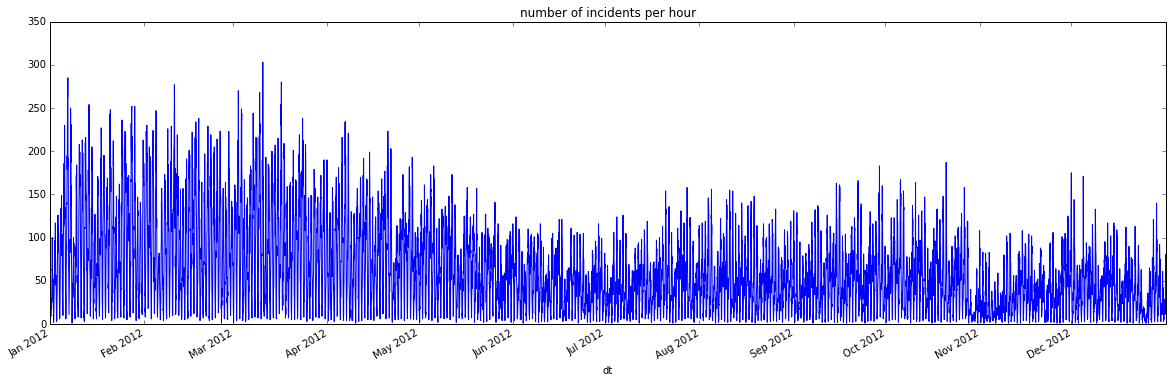

In [9]:
# let's make a plot - that shows trends over time
%pylab inline

sm_df.groupby(sm_df.dt).size().plot(figsize=(20,6))
title('number of incidents per hour')

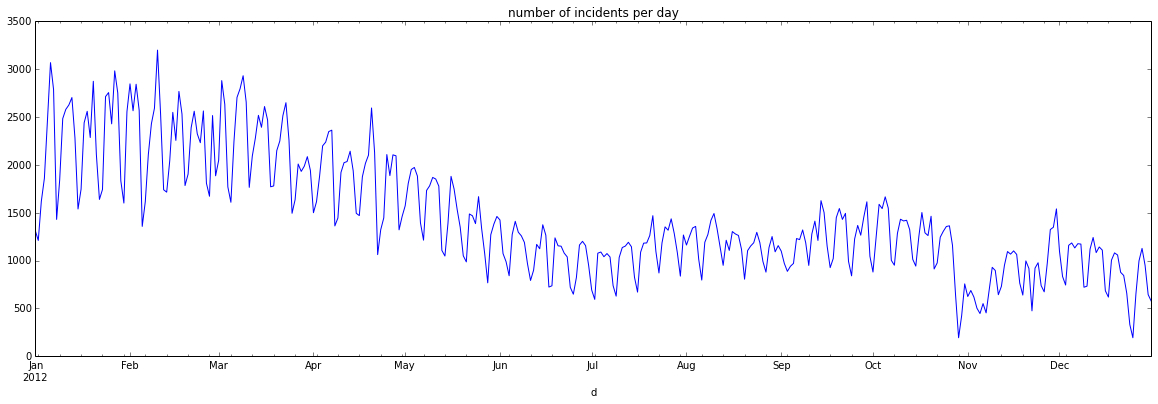

In [12]:
# Now grouped by day

sm_df['d']=sm_df[['datestop']].apply(lambda x: make_date(x['datestop']), axis=1)

sm_df.groupby(sm_df.d).size().plot(figsize=(20,6))
title('number of incidents per day')